In [1]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#reading the dataset
df=pd.read_csv("/Users/Prashant/Desktop/Uber case study-Data analysis project/Uber Request Data.csv")
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
len(df["Request id"].unique())

6745

In [4]:
#checking nulls values in columns 
df.isna().sum()


Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [5]:
#percentage of null values present in the dataset
df.isna().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [6]:
df["Request timestamp"]=df["Request timestamp"].astype(str)

In [7]:
df["Request timestamp"]=df["Request timestamp"].replace("/","-")

In [8]:
df["Request timestamp"]

0           11/7/2016 11:51
1           11/7/2016 17:57
2            12/7/2016 9:17
3           12/7/2016 21:08
4       13-07-2016 08:33:16
               ...         
6740    15-07-2016 23:49:03
6741    15-07-2016 23:50:05
6742    15-07-2016 23:52:06
6743    15-07-2016 23:54:39
6744    15-07-2016 23:55:03
Name: Request timestamp, Length: 6745, dtype: object

In [9]:
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"],dayfirst=True)

In [10]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [11]:
df["Drop timestamp"]=df["Drop timestamp"].astype(str)
df["Drop timestamp"]=df["Drop timestamp"].replace("/","-")


In [12]:
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"],dayfirst=True)

In [13]:
#Getting request hour from Request timestamo column
req_hour=df["Request timestamp"].dt.hour

In [14]:
df["req_hour"]=req_hour

In [15]:
#getting request day from Request timestamp column
req_day=df["Request timestamp"].dt.day

In [16]:
df["req_day"]=req_day

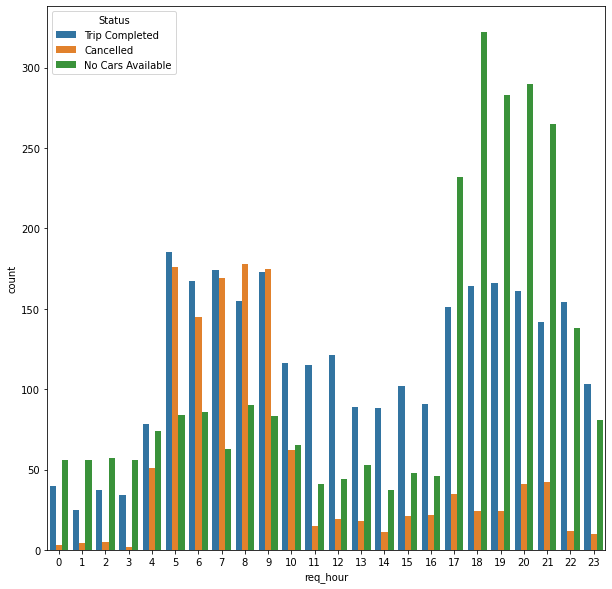

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(x="req_hour",hue="Status",data=df)
plt.show() 

C:\Users\Prashant\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


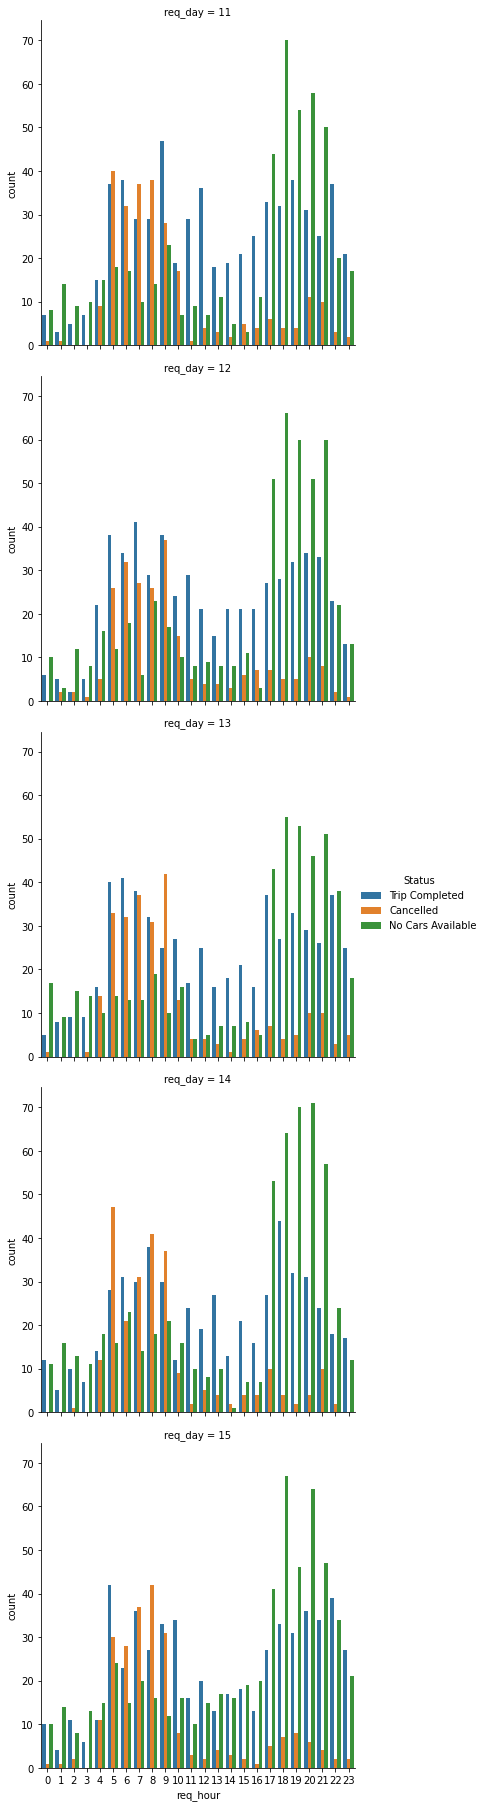

In [18]:
sns.factorplot(x='req_hour',data=df,row="req_day",hue='Status',kind="count")
plt.show()

C:\Users\Prashant\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


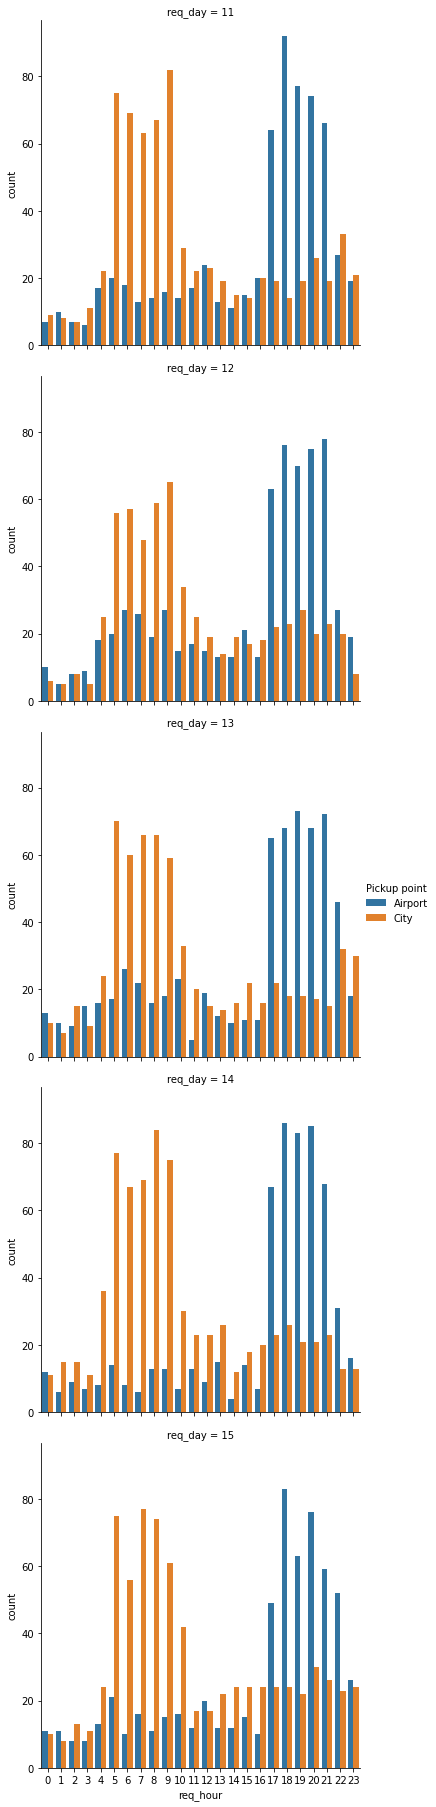

In [19]:
sns.factorplot(x='req_hour',data=df,row="req_day",hue="Pickup point",kind="count")


C:\Users\Prashant\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


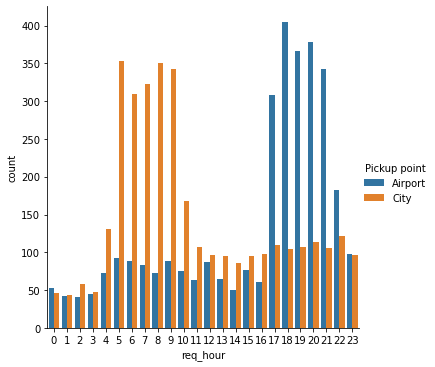

In [20]:
sns.factorplot(x='req_hour',data=df,hue="Pickup point",kind="count")


In [21]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


In [22]:
df["Time_slot"]=0

In [23]:
j=0
for i in df["req_hour"]:
    if df.iloc[j,6]<5:
        df.iloc[j,8]="Pre-morning"
    elif 5<=df.iloc[j,6]<10:
        df.iloc[j,8]="Morning rush"
    elif 10<=df.iloc[j,6]<=17:
        df.iloc[j,8]="Day time"
    elif 17<df.iloc[j,6]<=22:
        df.iloc[j,8]="evening rush"
    else:
        df.iloc[j,8]="late night rush"
    j=j+1

In [24]:
df["Time_slot"].value_counts()


evening rush       2228
Morning rush       2103
Day time           1642
Pre-morning         578
late night rush     194
Name: Time_slot, dtype: int64

<font color='red'>It seems like most of the request are made in evening rush, followed by morning rush and least request are made at late night </font>


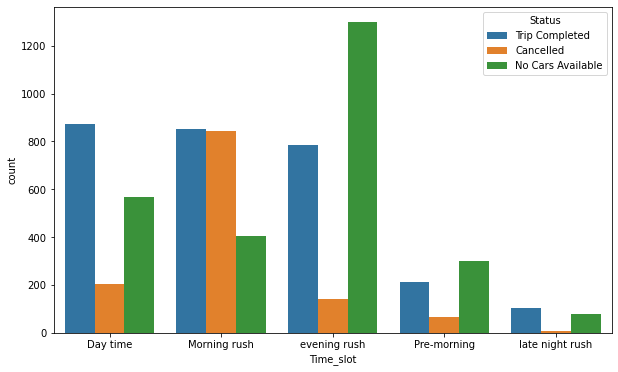

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x="Time_slot",data=df,hue="Status")
plt.show()

Most of the cars were not available during the eveneing rush whereas most of the cars were cancelled in morning rush 

In [26]:
df_morning_rush=df[df["Time_slot"]=="Morning rush"]

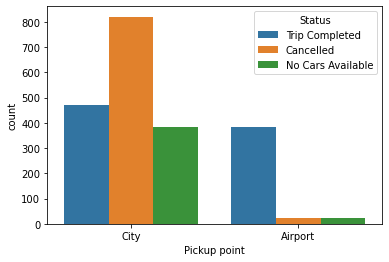

In [27]:
#more analysis on moring rush 
sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush)
plt.show()

# Severity of problem by location and their count(cancellation of cab as per the loaction at morning rush hours) 

In [28]:
df_airpot_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")]

In [29]:
df_airpot_cancelled.shape[0]

23

In [30]:
df_city_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")]

In [31]:
df_city_cancelled.shape


(820, 9)

# Supply and demand
# Moring rush-City

In [32]:
#df_morning_rush[df_morning_rush["Pickup point"]=="City"]
df_morning_rush.loc[df_morning_rush["Pickup point"]=="City"]  


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning rush
13,3075,City,2.0,Trip Completed,2016-07-13 08:02:53,2016-07-13 09:16:19,8,13,Morning rush
30,1826,City,4.0,Trip Completed,2016-07-12 09:27:00,2016-07-12 10:27:00,9,12,Morning rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning rush


In [33]:
df_morning_rush.loc[df_morning_rush["Pickup point"]=="City"].shape[0]

1677

In [34]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")].shape[0]


820

In [35]:
#total supply during moring rush hour at city
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]


472

In [36]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]


385

# Morning rush-Airport 

In [37]:
#total demand during the moring rush hour at airport
df_morning_rush.loc[df_morning_rush["Pickup point"]=="Airport"].shape[0]


426

In [38]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")].shape[0]


23

In [39]:
#toal supply during the moring rush hour at airport
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]


382

In [40]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]


21

# Evening rush-Airport

In [41]:
#more analysis on evening rush
df_evening_rush=df[df["Time_slot"]=="evening rush"]

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

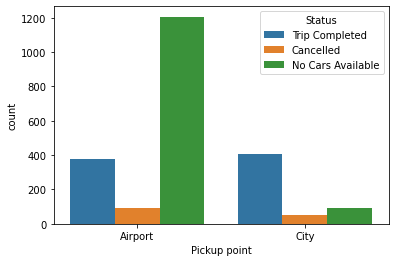

In [42]:
sns.countplot(x="Pickup point",hue="Status",data=df_evening_rush)

In [43]:
#total demand during evening rush hour at airport
df_evening_rush.loc[df_evening_rush["Pickup point"]=="Airport"].shape[0]

1675

In [44]:
#total supply during evening rush at airport
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

379

In [45]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

1206

In [46]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

90

# Evening Rush-City

In [47]:
#total demand during evening rush hour at city
df_evening_rush.loc[df_evening_rush["Pickup point"]=="City"].shape[0]

553

In [48]:
#total supply during evening rush hour at city
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

408

In [49]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

53

In [50]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

92

In [51]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Day time
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,evening rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning rush


# Pie Chart

In [57]:
df_morning_city=df.loc[(df["Pickup point"]=="City") & (df["Time_slot"]=="Morning rush")]

In [59]:
df_morning_city_count=pd.DataFrame(df_morning_city["Status"].value_counts())

In [60]:
df_morning_city_count["Status"].values

array([820, 472, 385], dtype=int64)

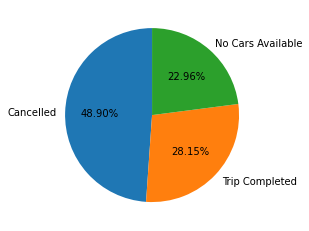

In [75]:
fig,ax=plt.subplots()
ax.pie(df_morning_city_count["Status"].values,labels=df_morning_city_count["Status"].index,autopct="%.2f%%",startangle=90)
plt.show()

In [63]:
df_evening_airport=df.loc[(df["Pickup point"]=="Airport") & (df["Time_slot"]=="evening rush")]

In [69]:
df_evening_airport_counts=pd.DataFrame(df_evening_airport["Status"].value_counts())

In [70]:
df_evening_airport_counts

,Status
No Cars Available,1206
Trip Completed,379
Cancelled,90


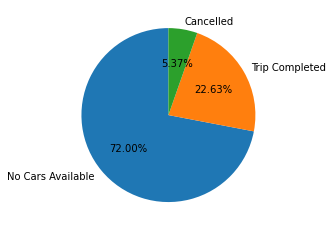

In [74]:
fig,ax=plt.subplots()
ax.pie(df_evening_airport_counts["Status"].values,labels=df_evening_airport_counts["Status"].index,autopct="%.2f%%",startangle=90)
plt.show()

1. They could be given a bonus for each trip they complete from the city to the aiprot in the moring rush. This will ensure that less number of trips are cancelled

2. Uber can pay for the gas mileage of drivers to come back to the city without a ride

3. Drivers can again be given bonus to compelete a trip from the airpot in the evening. This will ensure that the  supply increases at the airport.

4. Uber can also pay drivers to come without a passenger to the airport

5. Another way could be to increase licenses of car pooling taxis so that lesser number of cars can serve more passengers.